# Networks Project.


## Imports and settings box:

In [8]:
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '/Users/joelmcfarlane/Library/Mobile Documents/com~apple~CloudDocs/Documents\
/Imperial Physics year 3/Lecture Notes Y3/Complexity and Networks/Networks')

from Networks_functions import *

filepath = '/Users/joelmcfarlane/Library/Mobile Documents/com~apple~CloudDocs/Documents\
/Imperial Physics year 3/Lecture Notes Y3/Complexity and Networks/Networks/'

plt.rcParams['figure.figsize'] = [10, 5]

Note don't run these boxes as its been done already.

# Prefferential Attachment Generate graphs.

In [ ]:
#%% Create graphs for a range of m on PA model.
from Networks_functions import *
m_list = [1,2,4,8,16,32]
N_list = [100,1000,10000,100000]

for j in range(10):
    
    for i in range(len(N_list)):
        
        G = Graph_RA_original()
        
        G.add_N(N_list[i],3)
        nx.write_gpickle(G,'N_4k_m__'+str(m_list[i])+'_RA_vX_'+str(j))
        print('Done, N = '+str(m_list[i])+' iteration '+ str(j))

In [ ]:
from Networks_functions import *
N_list = [100,1000,10000]
#m_list = [1,2,4,8,16,32]
names = ["N_10__m_1_PA.gpickle","N_100__m_1_PA.gpickle",\
         "N_1k__m_1_PA.gpickle","N_10k__m_1_PA.gpickle"\
         ,"N_100k__m_1_PA.gpickle"]

#for i in range(len(N_list)):
#    G = Graph()
#    
#    G.add_N(N_list[i],1)
#    nx.write_gpickle(G, names[i])
#    print('Done {}'.format(N_list[i]))

for j in range(5):
    
    for i in range(len(N_list)):
        
        G = Graph_PA_fast(4)
        G.add_N(N_list[i])
        nx.write_gpickle(G,'N_'+str(N_list[i])+'__m_4_PA_v2_'+str(j+1))
        print('Done '+str(N_list[i])+' iteration '+ str(j))

# Generate Random Attachment Graphs:

In [ ]:
#%% - Pure Random Attachment
from Networks_functions import *


G = Graph_RA(1)
m = 1
G.add_N(30,m)
G.draw()


In [ ]:
from Networks_functions import *
#G_list = [G_10k,G_20k,G_40k,G_80k,G_160k]

N_list = [10**2,10**3,10**4,10**4,10**5]
m_list = [1,2,4,8,16,32]
names = ["N_4k__m_1_PA.gpickle","N_4k__m_2_PA.gpickle",\
         "N_4k__m_4_PA.gpickle","N_4k__m_8_PA.gpickle"\
         ,"N_4k__m_16_PA.gpickle","N_4k__m_32_PA.gpickle"]

for i in range(len(m_list)):
    G = Graph()
    m = m_list[i]
    G.add_N(4000,m)
    nx.write_gpickle(G, names[i])
    print('Done {}k'.format(m_list[i]))

# Generate Random Walk Preferential Attachment Graphs:

In [ ]:
#%% - TASK 4.2: Collect the data for a variety of m.
from Networks_functions import *

m_list = [1,2,4,8,16,32]
q_list = [0.99]
for q in q_list:
    
    for j in range(25):
        
        for i in range(len(m_list)):
            
            G = Graph_RWPA(q)
            
            G.add_N(4000,m_list[i])
            nx.write_gpickle(G,'N_4k__m_'+str(m_list[i])+'_q_'+str(q)+\
                            'RWPA'+str(j))
            print('Done '+str(m_list[i])+' iteration '+ str(j)+', q = '+str(q))
            
# =============================================================================

# Task 2.3.2:

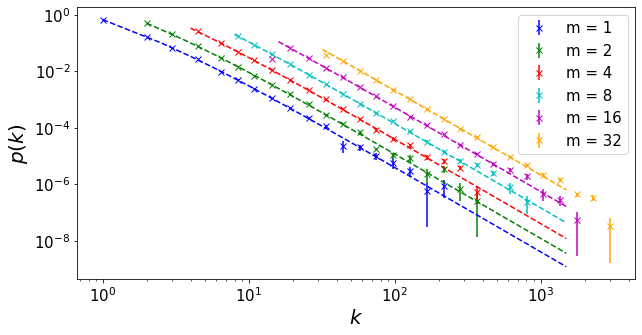

In [33]:
#%% -  TASK 2.3.2: Theoretical Result vs Numerical Data for fixed N, varying m.
# =============================================================================
from Networks_functions import *
m_list = [1,2,4,8,16,32]

for i in range(len(m_list)):
    
    degree_list = []
    x_s = []
    y_s = []
    
    for j in range(10):
        G = nx.read_gpickle(filepath+"N_4k_m__"+str(m_list[i])+"_PA"+str(j+10))
        degree_list.append([val for (node, val) in G.G.degree()])# if val>= m_list[i]])
        x, y = logbin([val for (node, val) in G.G.degree()],1.3)
        x_s.append(x)
        y_s.append(y)

    degree_list = np.array(degree_list).flatten()
    avgx, avgy,stdx,stdy = logbin_avg(x_s,y_s)
    
    df = frequency_B(degree_list)

    plt.xscale('log')
    plt.yscale('log')    
#    plt.scatter(df['Degree'],df['Probability'],marker = 'x',s=20,label = 'm ='\
#                +str(m_list[i]))
#    plt.xlabel('$k$')
#    plt.ylabel('$P(k)$')
    
#    x,y = logbin(degree_list,1.3)
    plt.errorbar(avgx,avgy,yerr=stdy,color=col_list[i],fmt='.',marker = 'x',\
                 label = 'm = '+str(m_list[i]))
    
    p = np.linspace(m_list[i],1500,1000)
    plt.plot(p,2*m_list[i]*(m_list[i]+1) / (p*(p+1)*(p+2)),\
             '--',color=col_list[i])#,label = '$p_\inf$')


plt.xlabel('$k$',fontsize = 20)
plt.ylabel('$p(k)$',fontsize = 20)
plt.tick_params(axis='both',labelsize=15)
plt.legend(loc='best',prop={'size':15})

Text(0, 0.5, '$p_N(k)$')

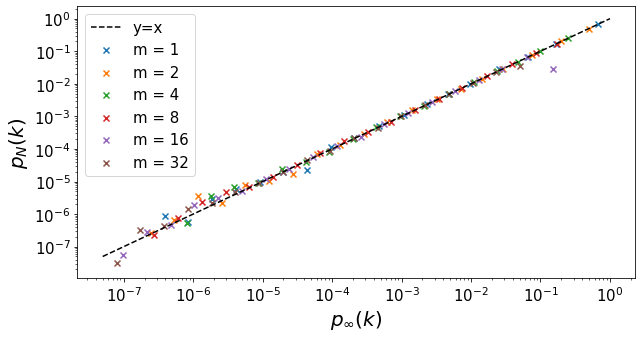

In [34]:
#%% - TASK 2.3.2: Comparison of theoretical to actual distribution.
# =============================================================================
from Networks_functions import *
m_list = [1,2,4,8,16,32]

for i in range(len(m_list)):
    
    degree_list = []
    x_s = []
    y_s = []
    
    for j in range(10):
        G = nx.read_gpickle(filepath+"N_4k_m__"+str(m_list[i])+"_PA"+str(j+10))
        degree_list.append([val for (node, val) in G.G.degree()])# if val>= m_list[i]])
        x, y = logbin([val for (node, val) in G.G.degree()],1.3)
        x_s.append(x)
        y_s.append(y)

    degree_list = np.array(degree_list).flatten()
    avgx, avgy,stdx,stdy = logbin_avg(x_s,y_s)
    
    theory = 2*m_list[i]*(m_list[i]+1) / (avgx*(avgx+1)*(avgx+2))
    
    plt.scatter(theory,avgy,marker = 'x',\
                 label = 'm = {}'.format(m_list[i]))
    plt.xscale('log')
    plt.yscale('log') 
    
p = np.linspace(5*10**-8,1,1000)
plt.plot(p,p,color = 'black',linestyle='--',label = 'y=x')
plt.legend(loc='best',prop={'size':15})
plt.xlabel('$p_\infty(k)$',fontsize = 20)
plt.tick_params(axis='both',labelsize=15)
plt.ylabel('$p_N(k)$',fontsize = 20)

# Task 2.3.3:

In [24]:
#%% - TASK 2.3.3: Statistical Chi Squared Analysis.
# =============================================================================
from Networks_functions import *


m_list = [1,2,4,8,16,32]

chi_sq_list = []
p_list = []

for i in range(len(m_list)):
    
    degree_list = []
    x_s = []
    y_s = []
    
    for j in range(10):
        G = nx.read_gpickle(filepath+"N_4k_m__"+str(m_list[i])+"_PA"+str(j+10))
#        degree_list.append([val for (node, val) in G.G.degree()])# if val>= m_list[i]])
        x, y = logbin([val for (node, val) in G.G.degree()],1.3)
        x_s.append(x)
        y_s.append(y)

#    degree_list = np.array(degree_list).flatten()
    avgx, avgy, errx, erry = logbin_avg(x_s,y_s)
    
    exp = 2*m_list[i]*(m_list[i]+1) / (avgx*(avgx+1)*(avgx+2))
    
    chi_sq, p = chisquare(avgy, exp)
    
    chi_sq_list.append(chi_sq)
    p_list.append(p)
    
df = pd.DataFrame(list(zip(m_list,chi_sq_list,p_list)),columns = ['m','Chi_sq','p'])
# =============================================================================

# Task 2.4.2:

The gradient of the line of best fit is: 0.5111435812859222
The error is: -0.0002497305912712034


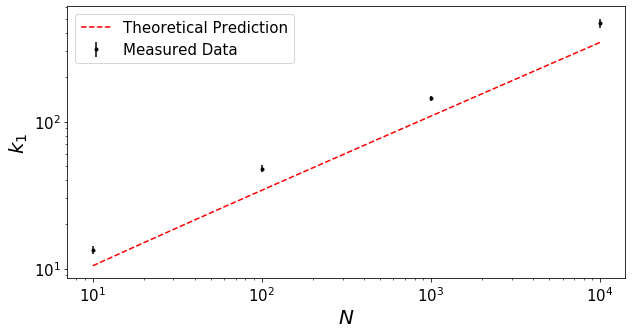

In [20]:
#%% - TASK 2.4.2: Read Data in and Graph the largest degree and errors.
# =============================================================================
from Networks_functions import *
N_list = [10,100,1000,10000]

m=3
mean_of_max = []
std_of_max = []
    
for i in range(len(N_list)):
    max_vals = []
    for j in range(10):
        
        G = nx.read_gpickle(filepath+"N_" +str(N_list[i])+"__m_3_PA_v2_"+str(j))
        
        max_vals.append(max(G.degree_list))
    
    mean_of_max.append(np.mean(max_vals))
    std_of_max.append(np.std(max_vals))
    
plt.errorbar(N_list,mean_of_max,yerr = std_of_max/np.sqrt(len(max_vals))\
             ,fmt = '.k',label = 'Measured Data')

x = np.linspace(10,10000,1000)
plt.plot(x,(-1+np.sqrt(4*m*x*(m+1)))/2,'r--',label = 'Theoretical Prediction')
    
plt.xlabel('$N$',fontsize = 20)
plt.ylabel('$k_1$',fontsize = 20)
plt.yscale('log')
plt.xscale('log')
plt.tick_params(axis='both',labelsize=15)
plt.legend(loc='best',prop={'size':15})

# Line of best fit gradient
popt,pcov = curve_fit(linear,np.log10(N_list),np.log10(mean_of_max))
print('The gradient of the line of best fit is: {}'.format(popt[0]))
print('The error is: {}'.format(pcov[1][0]))

# =============================================================================

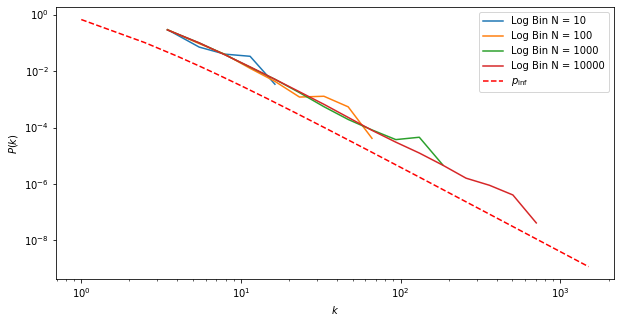

In [23]:
#%% - TASK 2.4.3:
# =============================================================================
from Networks_functions import *
N_list = [10,100,1000,10000]#,,100000]

for i in range(len(N_list)):
    total_degree_list = []
    x_s = []
    y_s = []
    for j in range(10):
        
        G = nx.read_gpickle(filepath+"N_" +str(N_list[i])+"__m_3_PA_v2_"+str(j))
        total_degree_list.append(G.degree_list)
        x,y=logbin(G.degree_list,1.4,zeros =True)
        x_s.append(x)
        y_s.append(y)
        
    total_degree_list = np.array(total_degree_list).flatten()
    
    avgx, avgy, erry, erry = logbin_avg(x_s,y_s)
#    df = frequency_B(total_degree_list)

    plt.xscale('log')
    plt.yscale('log')
#    plt.scatter(df['Degree'],df['Probability'],marker = 'x',s=20,label = 'N\
#                = '+str(len(G.degree_list) -2))
    plt.xlabel('$k$')
    plt.ylabel('$P(k)$')
    
#    x,y = logbin(total_degree_list,1.5)
    plt.plot(avgx,avgy,label = 'Log Bin N = '+str(N_list[i]))
    
p = np.linspace(1,1500,1000)
plt.plot(p,2*1*(1+1) / (p*(p+1)*(p+2)),'r--',label = '$p_\inf$')

plt.legend(loc='best')
# =============================================================================

100%|██████████| 10/10 [00:00<00:00, 26.07it/s]


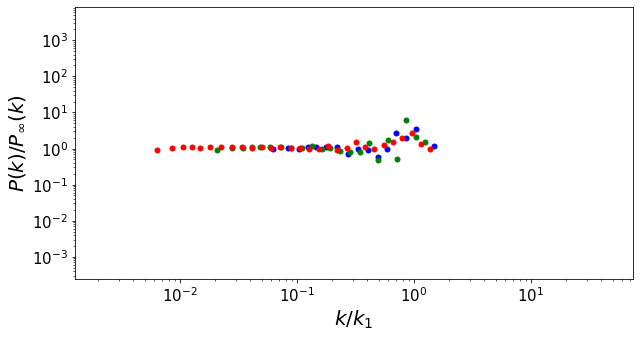

In [27]:
# =============================================================================
from Networks_functions import *
N_list = [100,1000,10000]#,100000]

m = 3

for i in range(len(N_list)):
    total_degree_list = []
    x_s = []
    y_s = []
    max_k = []
    for j in trange(10):
        
        G = nx.read_gpickle(filepath+"N_" +str(N_list[i])+"__m_"+str(m)\
                            +"_PA_v2_"+str(j))
        total_degree_list.append(G.degree_list)
        x,y = logbin(G.degree_list,1.2,zeros=True)
        x_s.append(x)
        y_s.append(y)
        max_k.append(max(G.degree_list))
    final_max = np.mean(max_k)
    
#    mean_x = np.mean(x_s,axis = 0)
#    mean_y = np.mean(y_s,axis=0)
#    total_degree_list = list(np.array(total_degree_list).flatten())
    
#    df = frequency_B(total_degree_list)
        
#    avg = np.mean(total_degree_list,axis = 0,dtype = 'int64')
    avgx, avgy,stdx,stdy = logbin_avg(x_s,y_s)
#    total = np.array(total_degree_list,dtype = 'int64').flatten()
    
    plt.xscale('log')
    plt.yscale('log')    
#    plt.scatter(df['Degree'],df['Probability'],marker = 'x',s=20,label = 'N\
#                = '+str(len(G.degree_list) -2))
    plt.xlabel('$k / k_1$',fontsize = 20)
    plt.ylabel('$P(k) / P_{\infty}(k)$',fontsize = 20)

#    avgx,avgy = logbin(total_degree_list,1.4)
#    plt.scatter(avgx / (-1+np.sqrt(1+m*N_list[i]*(m+1)/2)),avgy / ((2*m*(m+1) / (avgx*(avgx+1)*(avgx+2)))),\
#             color=col_list[i],marker='o',s=25,label = 'N = '+str(N_list[i]))
    
    plt.scatter(avgx / final_max,avgy / ((2*m*(m+1) / (avgx*(avgx+1)*(avgx+2)))),\
         color=col_list[i],marker='o',s=25,label = 'N = '+str(N_list[i]))
        
#    plt.plot(avgx / (np.sqrt(1*N_list[i]*2)),avgy / ((2*1*(1+1) / (avgx*(avgx+1)*(avgx+2))))\
#             ,label = 'Log Bin N = '+str(N_list[i]))

#plt.legend(loc='best',prop={'size':15})

plt.tick_params(axis='both',labelsize=15)
# =============================================================================

The $r^2$ value is 0.9996774158666517
The $chi^2$ value for the fitted law is 0.0008908988458794119 1.0
The KS value for the fitted law is 0.041666666666666664 0.9999999999999998
The $chi^2$ value for the power law -3 is 0.0033396275663492994 1.0


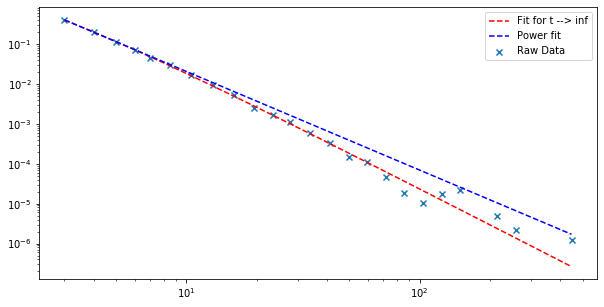

In [30]:
#%% - Fit the long time probability distribution.
from Networks_functions import *


popt,pcov = curve_fit(prob_inf,x,y)

plt.scatter(x,y,marker = 'x',label = 'Raw Data')
plt.plot(x,prob_inf(x,m),'r--',label = 'Fit for t --> inf')

#print('A =  {}'.format(popt[0]))

popt,pcov = curve_fit(power,x,y)
plt.plot(x,power(x,popt[0],popt[1]),'b--',label = 'Power fit')
#
plt.xscale('log')
plt.yscale('log')


plt.legend(loc = 'best')

r_sq = skm.r2_score(y,prob_inf(x,m))

chi_sq, p_val =sp.stats.chisquare(y,prob_inf(x,m))

chi_sq_2, p_val_2 =sp.stats.chisquare(y,power(x,popt[0],popt[1]))

KS,  p_KS = sp.stats.ks_2samp(y,prob_inf(x,m))


print(f'The $r^2$ value is {r_sq}')

print(f'The $chi^2$ value for the fitted law is {chi_sq} {p_val}')

print(f'The KS value for the fitted law is {KS} {p_KS}')

print(f'The $chi^2$ value for the power law -3 is {chi_sq_2} {p_val_2}')

# Read in Random Attachment Graph:


Not sure why exactly I decided to do this without a for loop, but oh well.

In [37]:
#%%  -  Create the average of all the data
#%% - Read Data In.
from Networks_functions import *
G_1 = nx.read_gpickle(filepath+"N_4k__m_1_RA.gpickle")
G_2 = nx.read_gpickle(filepath+"N_4k__m_2_RA.gpickle")
G_4 = nx.read_gpickle(filepath+"N_4k__m_4_RA.gpickle")
G_8 = nx.read_gpickle(filepath+"N_4k__m_8_RA.gpickle")
G_16 = nx.read_gpickle(filepath+"N_4k__m_16_RA.gpickle")
G_32 = nx.read_gpickle(filepath+"N_4k__m_32_RA.gpickle")

    
G_list = [G_1,G_2,G_4,G_8,G_16]  
N_list = [10000,20000,40000,80000,160000]
m_list = [1,2,4,8,16,32]

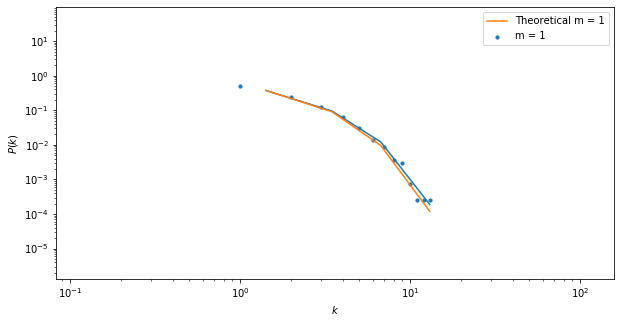

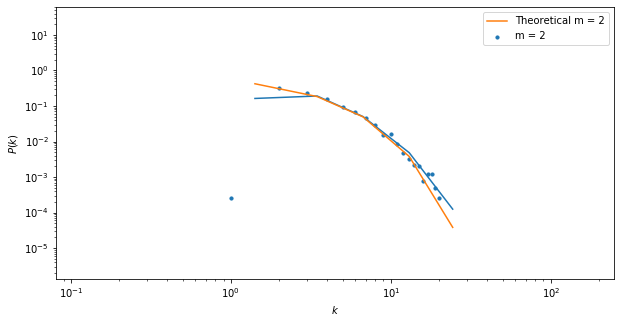

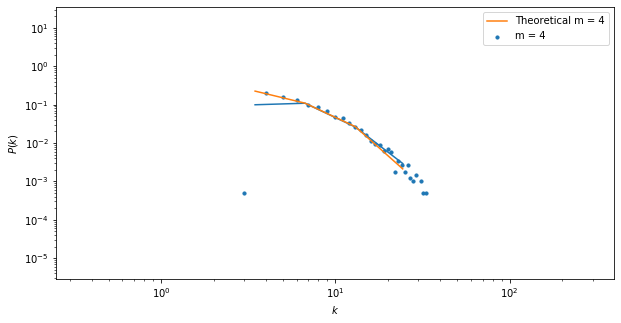

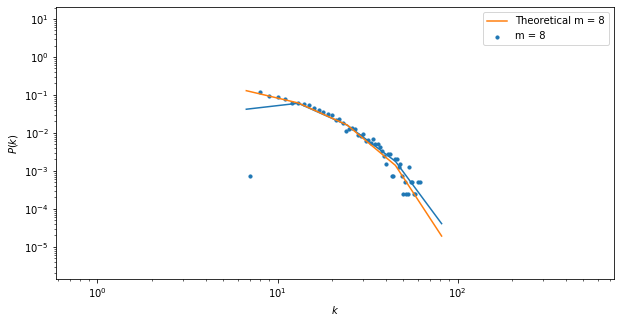

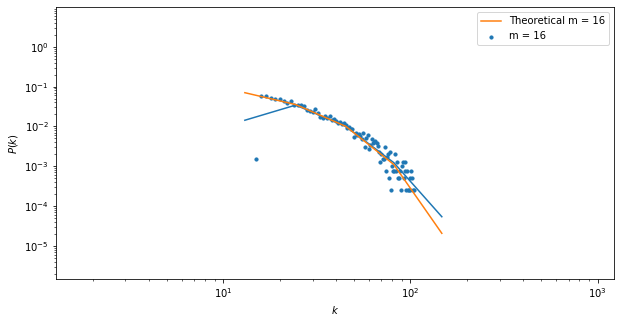

In [38]:
#%% - Plot of the Theoretical distribution vs the Actual distribution
i = 0
for g in G_list:
    m = m_list[i]
    df = frequency(g)

    plt.xscale('log')
    plt.yscale('log')

    plt.scatter(df['Degree'],df['Probability'],marker = '.',s=40,label = \
                'm = '+ str(m_list[i]))
    
    plt.xlabel('$k$')
    plt.ylabel('$P(k)$')
    

    x,y = logbin(g.degree_list,1.8)

    plt.plot(x,y)#,label = 'Log Bin ' + str(N_list[i])+ 'k')
    
    plt.plot(x,(m/(m+1))**(x-m)*(1/(m+1)),label = 'Theoretical m = '+str(m))

#popt,pcov = curve_fit(linear,np.log10(x),np.log10(y))
#plt.plot(np.log10(x),linear(np.log10(x),popt[0],popt[1]),label = 'fit')


    plt.legend(loc=  'best')
    plt.show()
    i+=1
    

In [39]:
#%% - Find Average Distribution via degree lists:
from Networks_functions import *

sample_listlist = []

G_1A = nx.read_gpickle(filepath+"N_4k__m_1_RA.gpickle")
G_1B = nx.read_gpickle(filepath+"N_4k__m_1_RA2.gpickle")
G_1C = nx.read_gpickle(filepath+"N_4k__m_1_RA3.gpickle")
G_1D = nx.read_gpickle(filepath+"N_4k__m_1_RA4.gpickle")
G_1E = nx.read_gpickle(filepath+"N_4k__m_1_RA5.gpickle")
G_1F = nx.read_gpickle(filepath+"N_4k__m_1_RA6.gpickle")
G_1G = nx.read_gpickle(filepath+"N_4k__m_1_RA7.gpickle")
#G_1H = nx.read_gpickle("N_4k__m_1_RA8.gpickle")

Temp_list = [G_1A,G_1B,G_1C,G_1D,G_1E,G_1F,G_1G]
list_deg_list = []

sample_listlist.append(Temp_list)
for G in Temp_list:
    deg_list = np.array(G.degree_list)
    list_deg_list.append(deg_list)
final_m1 = np.array(list_deg_list).flatten()

G_2A = nx.read_gpickle(filepath+"N_4k__m_2_RA.gpickle")
G_2B = nx.read_gpickle(filepath+"N_4k__m_2_RA2.gpickle")
G_2C = nx.read_gpickle(filepath+"N_4k__m_2_RA3.gpickle")
G_2D = nx.read_gpickle(filepath+"N_4k__m_2_RA4.gpickle")
G_2E = nx.read_gpickle(filepath+"N_4k__m_2_RA5.gpickle")
G_2F = nx.read_gpickle(filepath+"N_4k__m_2_RA6.gpickle")
G_2G = nx.read_gpickle(filepath+"N_4k__m_2_RA7.gpickle")
#G_2H = nx.read_gpickle("N_4k__m_2_RA8.gpickle")

Temp_list = [G_2A,G_2B,G_2C,G_2D,G_2E,G_2F,G_2G]
list_deg_list = []

sample_listlist.append(Temp_list)
for G in Temp_list:
    deg_list = np.array(G.degree_list)
    list_deg_list.append(deg_list)
final_m2 = np.array(list_deg_list).flatten()

G_4A = nx.read_gpickle(filepath+"N_4k__m_4_RA.gpickle")
G_4B = nx.read_gpickle(filepath+"N_4k__m_4_RA2.gpickle")
G_4C = nx.read_gpickle(filepath+"N_4k__m_4_RA3.gpickle")
G_4D = nx.read_gpickle(filepath+"N_4k__m_4_RA4.gpickle")
G_4E = nx.read_gpickle(filepath+"N_4k__m_4_RA5.gpickle")
G_4F = nx.read_gpickle(filepath+"N_4k__m_4_RA6.gpickle")
G_4G = nx.read_gpickle(filepath+"N_4k__m_4_RA7.gpickle")
#G_4H = nx.read_gpickle("N_4k__m_4_RA8.gpickle")

Temp_list = [G_4A,G_4B,G_4C,G_4D,G_4E,G_4F,G_4G]
list_deg_list = []

sample_listlist.append(Temp_list)
for G in Temp_list:
    deg_list = np.array(G.degree_list)
    list_deg_list.append(deg_list)
final_m4 = np.array(list_deg_list).flatten()

G_8A = nx.read_gpickle(filepath+"N_4k__m_8_RA.gpickle")
G_8B = nx.read_gpickle(filepath+"N_4k__m_8_RA2.gpickle")
G_8C = nx.read_gpickle(filepath+"N_4k__m_8_RA3.gpickle")
G_8D = nx.read_gpickle(filepath+"N_4k__m_8_RA4.gpickle")
G_8E = nx.read_gpickle(filepath+"N_4k__m_8_RA5.gpickle")
G_8F = nx.read_gpickle(filepath+"N_4k__m_8_RA6.gpickle")
G_8G = nx.read_gpickle(filepath+"N_4k__m_8_RA7.gpickle")
#G_8H = nx.read_gpickle("N_4k__m_8_RA8.gpickle")

Temp_list = [G_8A,G_8B,G_8C,G_8D,G_8E,G_8F,G_8G]
list_deg_list = []

sample_listlist.append(Temp_list)
for G in Temp_list:
    deg_list = np.array(G.degree_list)
    list_deg_list.append(deg_list)
final_m8 = np.array(list_deg_list).flatten()

G_16A = nx.read_gpickle(filepath+"N_4k__m_16_RA.gpickle")
G_16B = nx.read_gpickle(filepath+"N_4k__m_16_RA2.gpickle")
G_16C = nx.read_gpickle(filepath+"N_4k__m_16_RA3.gpickle")
G_16D = nx.read_gpickle(filepath+"N_4k__m_16_RA4.gpickle")
G_16E = nx.read_gpickle(filepath+"N_4k__m_16_RA5.gpickle")
G_16F = nx.read_gpickle(filepath+"N_4k__m_16_RA6.gpickle")
G_16G = nx.read_gpickle(filepath+"N_4k__m_16_RA7.gpickle")
#G_16H = nx.read_gpickle("N_4k__m_16_RA8.gpickle")

Temp_list = [G_16A,G_16B,G_16C,G_16D,G_16E,G_16F,G_16G]
list_deg_list = []

sample_listlist.append(Temp_list)
for G in Temp_list:
    deg_list = np.array(G.degree_list)
    list_deg_list.append(deg_list)
final_m16 = np.array(list_deg_list).flatten()

G_32A = nx.read_gpickle(filepath+"N_4k__m_32_RA.gpickle")
G_32B = nx.read_gpickle(filepath+"N_4k__m_32_RA2.gpickle")
G_32C = nx.read_gpickle(filepath+"N_4k__m_32_RA3.gpickle")
G_32D = nx.read_gpickle(filepath+"N_4k__m_32_RA4.gpickle")
G_32E = nx.read_gpickle(filepath+"N_4k__m_32_RA5.gpickle")
G_32F = nx.read_gpickle(filepath+"N_4k__m_32_RA6.gpickle")
G_32G = nx.read_gpickle(filepath+"N_4k__m_32_RA7.gpickle")
#G_32H = nx.read_gpickle("N_4k__m_32_RA8.gpickle")

Temp_list = [G_32A,G_32B,G_32C,G_32D,G_32E,G_32F,G_32G]
list_deg_list = []

sample_listlist.append(Temp_list)
for G in Temp_list:
    deg_list = np.array(G.degree_list)
    list_deg_list.append(deg_list)
final_m32 = np.array(list_deg_list).flatten()


all__list = [final_m1,final_m2,final_m4,final_m8,final_m16,final_m32]
m_list = [1,2,4,8,16,32]


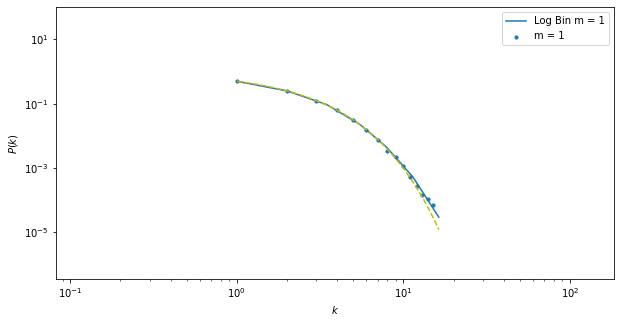

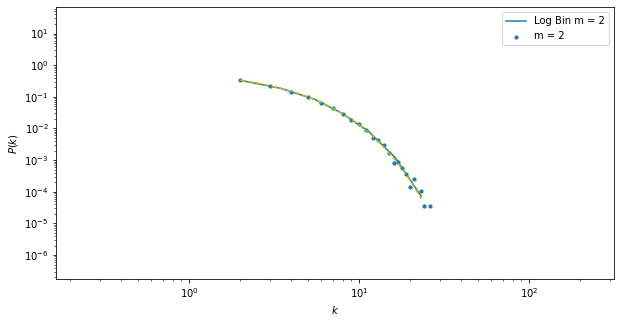

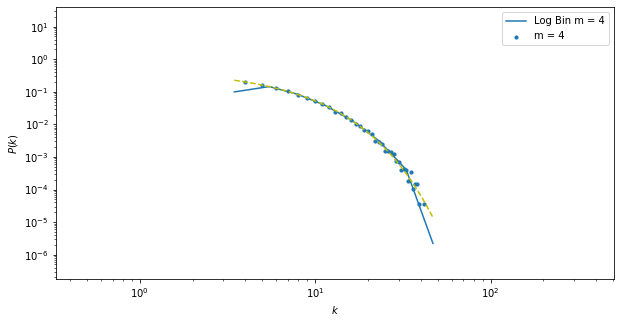

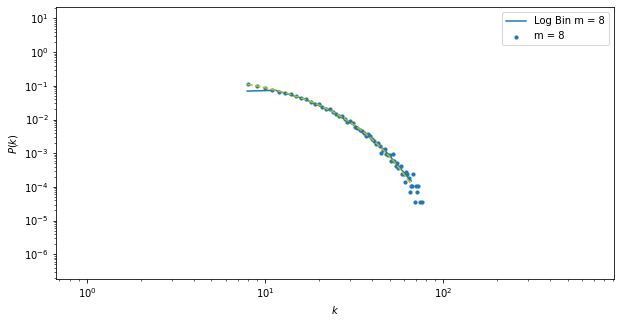

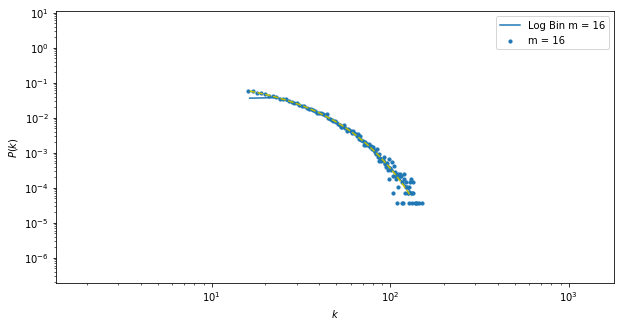

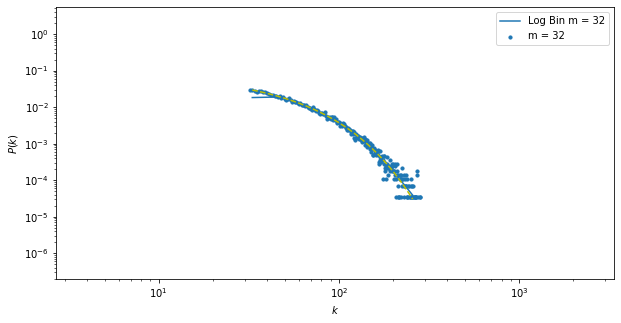

In [40]:
#%% - Plot the average distributions vs their predictions.
from Networks_functions import *

i = 0

for g in all__list:
    m = m_list[i]
    df = frequency_B(all__list[i])
    
    plt.xscale('log')
    plt.yscale('log')

    plt.scatter(df['Degree'],df['Probability'],marker = '.',s=40,label = \
                'm = '+ str(m_list[i]))
    
    plt.xlabel('$k$')
    plt.ylabel('$P(k)$')
    

    x,y = logbin(all__list[i],1.4 )

    plt.plot(x,y,label = 'Log Bin m = ' + str(m_list[i]))
    n = np.linspace(min(x),max(x),1000)
    plt.plot(n,(m/(m+1))**(n-m)*(1/(m+1)),'y--')#,label = 'Theory m = '+str(m))

#popt,pcov = curve_fit(linear,np.log10(x),np.log10(y))
#plt.plot(np.log10(x),linear(np.log10(x),popt[0],popt[1]),label = 'fit')


    plt.legend(loc=  'best')
    plt.show()
    i+=1
    

# Task 3.2.1:

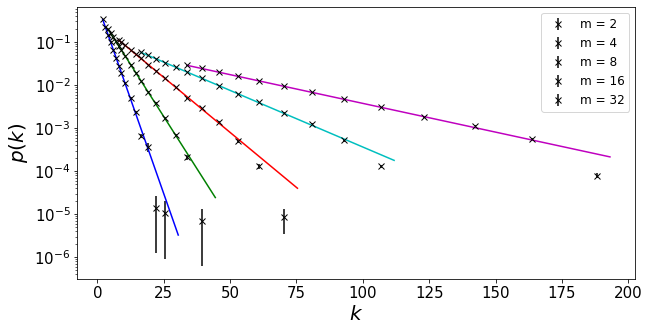

In [42]:
#%% -  TASK 3.2.1: Theoretical Result vs Numerical Data for fixed N, varying m.
# =============================================================================
# =============================================================================
from Networks_functions import *
m_list = [2,4,8,16,32]

for i in range(len(m_list)):
    
    degree_list = []
    x_s = []
    y_s = []
    
    for j in range(2,8):
        G = nx.read_gpickle(filepath+"N_4k__m_"+str(m_list[i])+"_RA"+str(j)+'.gpickle')
        degree_list.append([val for (node, val) in G.G.degree()])# if val>= m_list[i]])
        x, y = logbin([val for (node, val) in G.G.degree()],1.15)
        x_s.append(x)
        y_s.append(y)

    degree_list = np.array(degree_list).flatten()
    avgx, avgy,stdx,stdy = logbin_avg(x_s,y_s)
    avgx = avgx[1:]
    avgy = avgy[1:]
    stdy = stdy[1:]
    
    
    df = frequency_B(degree_list)

#    plt.xscale('log')
    plt.yscale('log')    
#    plt.scatter(df['Degree'],df['Probability'],marker = 'x',s=20,label = 'm ='\
#                +str(m_list[i]))
#    plt.xlabel('$k$')
#    plt.ylabel('$P(k)$')
    
#    x,y = logbin(degree_list,1.3)
    plt.errorbar(avgx,avgy,yerr=stdy,color='black',fmt='.',marker = 'x',\
                 label = 'm = '+str(m_list[i]))
    
    p = np.linspace(min(avgx),max(avgx)+5,1000)
    plt.plot(p,(m_list[i]/(m_list[i]+1))**(p-m_list[i])*(1/(m_list[i]+1)),\
             '',color=col_list[i])#,label = '$p_\inf$')


plt.xlabel('$k$',fontsize = 20)
plt.ylabel('$p(k)$',fontsize = 20)
plt.tick_params(axis='both',labelsize=15)
plt.legend(loc='best',prop={'size':12})
# =============================================================================
# =============================================================================

Text(0, 0.5, '$p_N(k)$')

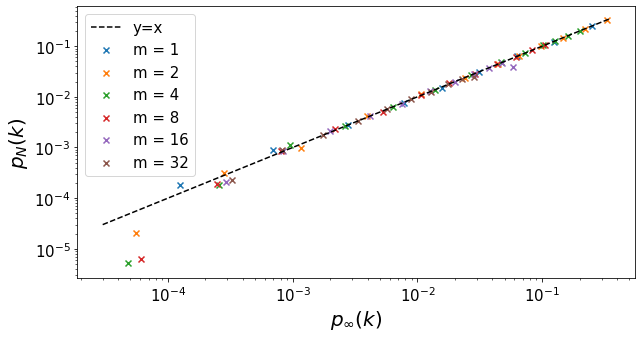

In [43]:
#%% - TASK 3.2.1: Degree Distribution vs theoretical (EXTENSION)
# =============================================================================
# =============================================================================
from Networks_functions import *
m_list = [1,2,4,8,16,32]

for i in range(len(m_list)):
    
    degree_list = []
    x_s = []
    y_s = []
    
    for j in range(2,8):
        G = nx.read_gpickle(filepath+"N_4k__m_"+str(m_list[i])+"_RA"+str(j)+'.gpickle')
        degree_list.append([val for (node, val) in G.G.degree()])# if val>= m_list[i]])
        x, y = logbin([val for (node, val) in G.G.degree()],1.2)
        x_s.append(x)
        y_s.append(y)
        
    degree_list = np.array(degree_list).flatten()
    avgx, avgy,stdx,stdy = logbin_avg(x_s,y_s)
    avgx = avgx[1:]
    avgy = avgy[1:]    
    theory = ( m_list[i] / (m_list[i] + 1))**(avgx - m_list[i]) * (1/(m_list[i] + 1))
    
    plt.scatter(theory,avgy,marker = 'x',\
                 label = 'm = {}'.format(m_list[i]))
    plt.xscale('log')
    plt.yscale('log') 
    
p = np.linspace(3*10**-5,0.35,1000)
plt.plot(p,p,color = 'black',linestyle='--',label = 'y=x')
plt.legend(loc='best',prop={'size':15})
plt.xlabel('$p_\infty(k)$',fontsize = 20)
plt.tick_params(axis='both',labelsize=15)
plt.ylabel('$p_N(k)$',fontsize = 20) 

In [44]:
#%% - TASK 3.2.1: Statistical Chi Squared Analysis.
# =============================================================================
from Networks_functions import *


m_list = [1,2,4,8,16,32]

chi_sq_list = []
p_list = []

for i in range(len(m_list)):
    
    degree_list = []
    x_s = []
    y_s = []
    
    for j in range(2,8):
        G = nx.read_gpickle(filepath+"N_4k__m_"+str(m_list[i])+"_RA"+str(j)+'.gpickle')
#        degree_list.append([val for (node, val) in G.G.degree()])# if val>= m_list[i]])
        x, y = logbin([val for (node, val) in G.G.degree()],1.3)
        x_s.append(x)
        y_s.append(y)
        
    avgx = avgx[1:]
    avgy = avgy[1:]
    stdy = stdy[1:]
#    degree_list = np.array(degree_list).flatten()
    avgx, avgy,stdx,stdy = logbin_avg(x_s,y_s)
    
    exp =( m_list[i] / (m_list[i] + 1))**(avgx - m_list[i]) * (1/(m_list[i] + 1))
    
    chi_sq, p = chisquare(avgy, exp)
    
    chi_sq_list.append(chi_sq)
    p_list.append(p)
    
df = pd.DataFrame(list(zip(m_list,chi_sq_list,p_list)),columns = ['m','Chi_sq','p'])
print(df)
# =============================================================================

    m    Chi_sq         p
0   1  0.000245  1.000000
1   2  0.499744  0.999970
2   4  0.249250  0.999999
3   8  0.131905  1.000000
4  16  0.037677  1.000000
5  32  0.001689  1.000000


# Task 3.2.2:

The gradient of the line of best fit is: 0.1702626220730677
The error is: -0.0017582687532229305


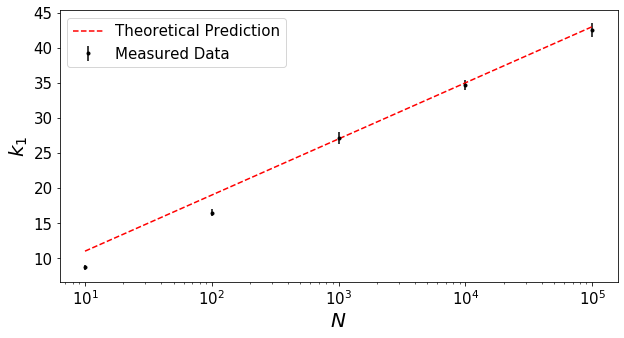

In [46]:
#%% - TASK 3.2.2: Largest Degree Numerical Results
# =============================================================================
# =============================================================================
from Networks_functions import *
N_list = [100,1000,10000,100000,10]
m_list = [1,2,4,8,16,32]
m=3
mean_of_max = []
std_of_max = []
    
for i in range(len(N_list)):
    max_vals = []
    for j in range(10):
        
        G = nx.read_gpickle(filepath+'N_4k_m__'+str(m_list[i])+'_RA_vX_'+str(j))
        
        max_vals.append(max(G.degree_list))
    
    mean_of_max.append(np.mean(max_vals))
    std_of_max.append(np.std(max_vals))
    
plt.errorbar(N_list,mean_of_max,yerr = std_of_max/np.sqrt(len(max_vals))\
             ,fmt = '.k',label = 'Measured Data')

x = np.linspace(10,100000,10000)
plt.plot(x,m+1/(np.log((m+1)/m)) * np.log(x),'r--',label = 'Theoretical Prediction')
    
plt.xlabel('$N$',fontsize = 20)
plt.ylabel('$k_1$',fontsize = 20)
#plt.yscale('log')
plt.xscale('log')
plt.tick_params(axis='both',labelsize=15)
plt.legend(loc='best',prop={'size':15})

# Line of best fit gradient
popt,pcov = curve_fit(linear,np.log10(N_list),np.log10(mean_of_max))
print('The gradient of the line of best fit is: {}'.format(popt[0]))
print('The error is: {}'.format(pcov[1][0]))

# =============================================================================

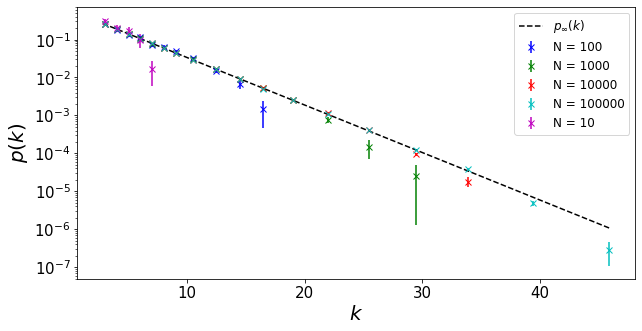

In [48]:
#%% - TASK 3.2.2: Degree Distribution:
# =============================================================================
# =============================================================================
from Networks_functions import *
m_list = [1,2,4,8,16,32]
N_list = [100,1000,10000,100000,10]

m = 3

for i in range(len(N_list)):
    
    degree_list = []
    x_s = []
    y_s = []
    
    for j in range(10):
        G = nx.read_gpickle(filepath+'N_4k_m__'+str(m_list[i])+'_RA_vX_'+str(j))
        degree_list.append([val for (node, val) in G.G.degree()])# if val>= m_list[i]])
        x, y = logbin([val for (node, val) in G.G.degree()],1.15)
        x_s.append(x)
        y_s.append(y)

    degree_list = np.array(degree_list).flatten()
    avgx, avgy,stdx,stdy = logbin_avg(x_s,y_s)
    avgx = avgx[1:]
    avgy = avgy[1:]
    stdy = stdy[1:]
    
    
    df = frequency_B(degree_list)

#    plt.xscale('log')
    plt.yscale('log')    
#    plt.scatter(df['Degree'],df['Probability'],marker = 'x',s=20,label = 'm ='\
#                +str(m_list[i]))
#    plt.xlabel('$k$')
#    plt.ylabel('$P(k)$')
    
#    x,y = logbin(degree_list,1.3)
    plt.errorbar(avgx,avgy,yerr=stdy,color=col_list[i],fmt='.',marker = 'x',\
                 label = 'N = '+str(N_list[i]))
    
p = np.linspace(2.8,46,1000)
plt.plot(p,(m/(m+1))**(p-m)*(1/(m+1)),\
             '--',color='black',label = '$p_{\infty}(k)$')


plt.xlabel('$k$',fontsize = 20)
plt.ylabel('$p(k)$',fontsize = 20)
plt.tick_params(axis='both',labelsize=15)
plt.legend(loc='best',prop={'size':12})
# =============================================================================
# =============================================================================

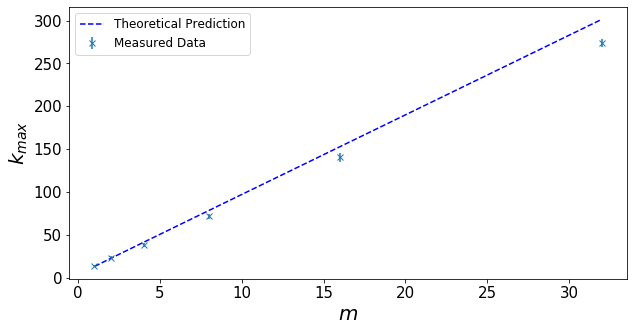

In [49]:
#%% - Theretical Prediction for largest degree k1 vs prediction.

m_list = np.array([1,2,4,8,16,32])

max_degrees = []
err_max_degrees = []

for i in range(len(m_list)):
    
    sample = sample_listlist[i]
    max_vals = []
    
    for s in sample:
        
        max_ = max(s.degree_list)
        
        max_vals.append(max_)
        
    mean_of_max = np.mean(max_vals)
    max_degrees.append(mean_of_max)
    err_max_degrees.append(np.std(max_vals))# / np.sqrt(len(max_vals))))
    
    
plt.errorbar(m_list, max_degrees,yerr = err_max_degrees,fmt = 'x',\
             label = 'Measured Data')

plt.plot(m_list, m_list - np.log(4000)/(np.log(m_list) - np.log(m_list+1)),\
         'b--',label = 'Theoretical Prediction')

plt.ylabel('$k_{max}$',fontsize = 20)
plt.xlabel('$m$',fontsize = 20)
plt.tick_params(axis='both',labelsize=15)
plt.legend(loc='best',prop={'size':12})

# Task 4.2

100%|██████████| 1000/1000 [00:00<00:00, 2382.72it/s]


Text(0, 0.5, 'Probability')

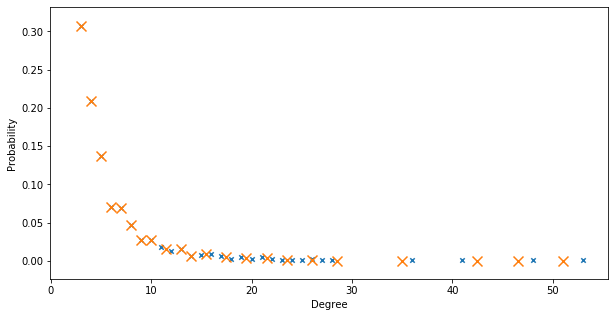

In [50]:
from Networks_functions import *

G = Graph_RWPA()

G.add_N(1000,3)

#G.draw()
df = frequency(G)
plt.scatter(df['Degree'],df['Probability'],marker ='x',s=20,label = 'Raw Data')
#


x,y = logbin([val for (node, val) in G.G.degree()],1.1)
plt.scatter(x,y,marker = 'x',s =100)#,label = 'Log Bin, m = '+str(m_list[i])

plt.xlabel('Degree')
plt.ylabel('Probability')
    
#plt.xscale('log')
#plt.yscale('log')

# Task 4.3:

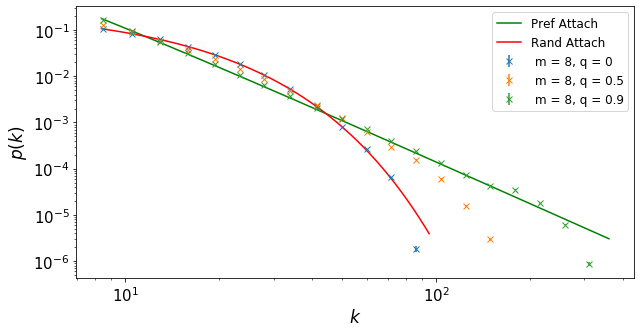

In [52]:
#%% - TASK 4.3: Numerical Analysis.
# =============================================================================
from Networks_functions import *
m_list = [8]
q_list = [0,0.5,0.9]

for q in q_list:
    
    for i in range(len(m_list)):
#        x_dump = []
        x_s = []
        y_s = []
        
        for j in range(25):
            G = nx.read_gpickle(filepath+"N_4k__m_" +str(m_list[i])+"_q_"+str(q)+\
                                'RWPA'+str(j))
#            x_dump.append([val for (node, val) in G.G.degree()])
            x, y = logbin([val for (node, val) in G.G.degree()],1.2)
            x_s.append(x)
            y_s.append(y)
            
#        x_dump = np.array(x_dump).flatten()
#        x,y = logbin(x_dump,1.2)
        avgx, avgy, stdx, stdy = logbin_avg(x_s,y_s)
#        plt.plot(x,y,marker = 'x',label = 'q = '+str(q)+\
#                    ', m = '+str(m_list[i]))
        plt.errorbar(avgx,avgy,yerr = stdy/np.sqrt(len(stdy)),fmt = '.',\
                     marker = 'x',label = ' m = '+str(m_list[i]) + ', q = '+str(q))
        
        plt.xscale('log')
        plt.yscale('log')
        
m = 8
x1 = np.linspace(8.4,360,10000)
plt.plot(x1,2*m*(m+1) / (x1*(x1+1)*(x1+2)),'g',\
         label = 'Pref Attach')
x1 = np.linspace(8.4,95,10000)
plt.plot(x1,(m / (m + 1))**(x1 - m) * (1/(m + 1)), 'r',\
         label = 'Rand Attach')

#m = 32
#x2 = np.linspace(33,700,10000)
#plt.plot(2*m*(m+1) / (x1*(x1+1)*(x1+2)))



plt.xlabel('$k$',fontsize = 17)
plt.ylabel('$p(k)$',fontsize = 17)

plt.tick_params(axis='both',labelsize=15)
plt.legend(loc='best',prop={'size':12})
# =============================================================================

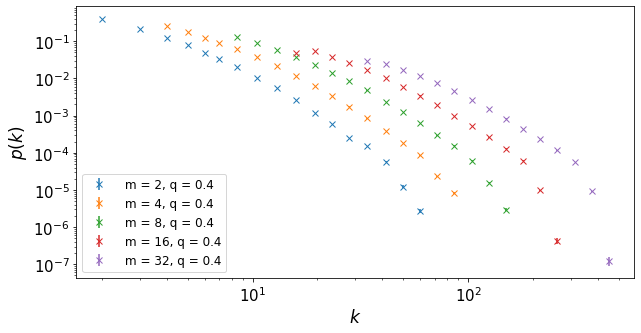

In [54]:
#%% - TASK 4.3: Visual Data. for all m
# =============================================================================
# =============================================================================
from Networks_functions import *
m_list = [2,4,8,16,32]
q_list = [0.5]

for q in q_list:
    
    for i in range(len(m_list)):
#        x_dump = []
        x_s = []
        y_s = []
        
        for j in range(25):
            G = nx.read_gpickle(filepath+"N_4k__m_" +str(m_list[i])+"_q_"+str(q)+\
                                'RWPA'+str(j))
#            x_dump.append([val for (node, val) in G.G.degree()])
            x, y = logbin([val for (node, val) in G.G.degree()],1.2)
            x_s.append(x)
            y_s.append(y)
            
#        x_dump = np.array(x_dump).flatten()
#        x,y = logbin(x_dump,1.2)
        avgx, avgy, stdx, stdy = logbin_avg(x_s,y_s)
#        plt.plot(x,y,marker = 'x',label = 'q = '+str(q)+\
#                    ', m = '+str(m_list[i]))
        plt.errorbar(avgx,avgy,yerr = stdy/np.sqrt(len(stdy)),fmt = '.',\
                     marker = 'x',label = ' m = '+str(m_list[i]) + ', q = '+str(q-0.1))
        
        plt.xscale('log')
        plt.yscale('log')
        

plt.xlabel('$k$',fontsize = 17)
plt.ylabel('$p(k)$',fontsize = 17)

plt.tick_params(axis='both',labelsize=15)
plt.legend(loc='best',prop={'size':12})
# =============================================================================
# =============================================================================

In [56]:
#%% - TASK 4.3: Statistical Analysis:
# =============================================================================
# =============================================================================
"RANDOM ATTACHMENT STATS"
from Networks_functions import *
m_list = [1,2,4,8,16,32]
q_list = [0]

for q in q_list:
    
    chi_sq_list = []
    p_list = []
    
    for i in range(len(m_list)):
#        x_dump = []
        x_s = []
        y_s = []
        
        for j in range(25):
            G = nx.read_gpickle(filepath+"N_4k__m_" +str(m_list[i])+"_q_"+str(q)+\
                                'RWPA'+str(j))
#            x_dump.append([val for (node, val) in G.G.degree()])
            x, y = logbin([val for (node, val) in G.G.degree()],1.2)
            x_s.append(x)
            y_s.append(y)
            
#        x_dump = np.array(x_dump).flatten()
#        x,y = logbin(x_dump,1.2)
        avgx, avgy, stdx, stdy = logbin_avg(x_s,y_s)
        exp =( m_list[i] / (m_list[i] + 1))**(avgx - m_list[i]) * (1/(m_list[i] + 1))
    
        chi_sq, p = chisquare(avgy, exp)
    
        chi_sq_list.append(chi_sq)
        p_list.append(p)
    
    df1 = pd.DataFrame(list(zip(m_list,chi_sq_list,p_list)),columns = ['m','Chi_sq','p'])
    print(df1)
# =============================================================================
# =============================================================================
"PREFERENTIAL ATTACHMENT STATS"
from Networks_functions import *
m_list = [1,2,4,8,16,32]
q_list = [0.9]

for q in q_list:
    
    chi_sq_list = []
    p_list = []
    
    for i in range(len(m_list)):
#        x_dump = []
        x_s = []
        y_s = []
        
        for j in range(25):
            G = nx.read_gpickle(filepath+"N_4k__m_" +str(m_list[i])+"_q_"+str(q)+\
                                'RWPA'+str(j))
#            x_dump.append([val for (node, val) in G.G.degree()])
            x, y = logbin([val for (node, val) in G.G.degree()],1.2)
            x_s.append(x)
            y_s.append(y)
            
#        x_dump = np.array(x_dump).flatten()
#        x,y = logbin(x_dump,1.2)
        avgx, avgy, stdx, stdy = logbin_avg(x_s,y_s)
        exp =2*m_list[i]*(m_list[i]+1) / (avgx*(avgx+1)*(avgx+2))
    
        chi_sq, p = chisquare(avgy, exp)
    
        chi_sq_list.append(chi_sq)
        p_list.append(p)
    
    df2 = pd.DataFrame(list(zip(m_list,chi_sq_list,p_list)),columns = ['m','Chi_sq','p'])
    print(df2)
# =============================================================================
# =============================================================================

    m    Chi_sq    p
0   1  0.000069  1.0
1   2  0.000074  1.0
2   4  0.000048  1.0
3   8  0.000033  1.0
4  16  0.007571  1.0
5  32  0.000697  1.0
    m    Chi_sq    p
0   1  0.001219  1.0
1   2  0.002090  1.0
2   4  0.001765  1.0
3   8  0.000976  1.0
4  16  0.021660  1.0
5  32  0.003165  1.0


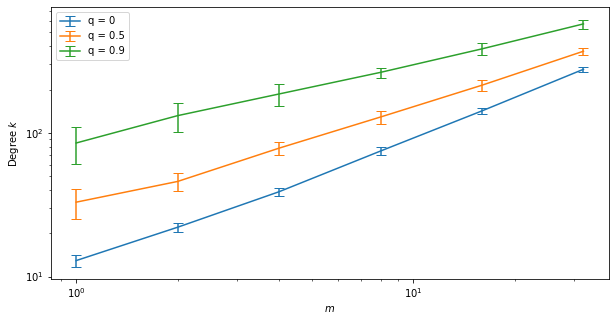

In [57]:
#%% - TASK 4.3: Numerical Analysis. Largest Degree
# =============================================================================
from Networks_functions import *
m_list = [1,2,4,8,16,32]
q_list = [0,0.5,0.9]

for q in q_list:
    
    k_stdmax = []
    k_meanmax = []
    for i in range(len(m_list)):
#        x_dump = []
        k_max = []
        k_stds = []
        for j in range(25):
            G = nx.read_gpickle(filepath+"N_4k__m_" +str(m_list[i])+"_q_"+str(q)+\
                                'RWPA'+str(j))
            k_max_ = max([val for (node, val) in G.G.degree()])
            k_max.append(k_max_)
            
        k_meanmax.append(np.mean(k_max))
        k_stdmax.append(np.std(k_max))
        
    plt.errorbar(m_list,k_meanmax,yerr = k_stdmax,fmt='',capsize=5,\
                    label = 'q = '+str(q)) 
    
            
            
plt.xscale('log')
plt.yscale('log')

plt.xlabel('$m$')
plt.ylabel('Degree $k$')

plt.legend(loc='best')
# =============================================================================